# ЗАДАНИЕ 1. ПЕРВИЧНЫЙ АНАЛИЗ ВРЕМЕННОГО РЯДА С ИСПОЛЬЗОВАНИЕМ ОПИСАТЕЛЬНЫХ СТАТИСТИК И ВИЗУАЛИЗАЦИИ

In [71]:
import os
import pandas as pd 
import numpy as np
from pandas import DataFrame
from pandas import Grouper

In [39]:
os.chdir("C:/Users/HP/Documents/analysis/TS/data/")

In [40]:
data = pd.read_excel('data.xls', sheet_name='Material 1')
data.head()

,Unnamed: 0,Unnamed: 1,Рыночные цены на материал 1 (руб.),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,NaN,NaN,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,...,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00
1,№ организации,1.0,26.45,23.89,25.95,30.03,28.96,25.58,25.96,30.56,...,37.36,39.21,39.43,43.5,40.75,42.84,38.01,45.18,42.49,44.2
2,NaN,2.0,26.09,20.66,22.6,25.05,27.59,20.49,27.39,28.52,...,39.54,42.38,37.5,41.29,44.96,45.39,42.49,45.77,46.94,40.83
3,NaN,3.0,22.05,23.15,28.22,21.55,21.57,28.58,31.42,28.11,...,40.17,47.99,47.92,46.25,47.3,48.9,51.2,43.96,49.22,51.38
4,NaN,4.0,20.41,28.39,17.74,18.46,20.47,28.93,27.89,20.68,...,68.39,73.93,63.97,75.59,70.98,78.28,78.98,71.27,81.34,85.73


In [41]:
dates = data.loc[data.index == 0].values[0, 2:]
val = data.loc[data.index == 1].values[0, 2:]

In [42]:
data={"Date": dates, "Value": val}

In [43]:
my_data = pd.DataFrame(data)
my_data.head()

,Date,Value
0,2007-01-01,26.45
1,2007-02-01,23.89
2,2007-03-01,25.95
3,2007-04-01,30.03
4,2007-05-01,28.96


In [44]:
my_data=my_data.set_index('Date')
my_data.head()

,Value
Date,
2007-01-01,26.45
2007-02-01,23.89
2007-03-01,25.95
2007-04-01,30.03
2007-05-01,28.96


In [45]:
my_data.size

48

In [46]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Value   48 non-null     object
dtypes: object(1)
memory usage: 768.0+ bytes


In [48]:
my_data.Value=my_data.Value.astype(float)

In [32]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [11]:
my_data.loc['2007']

,Value
Date,
2007-01-01,26.45
2007-02-01,23.89
2007-03-01,25.95
2007-04-01,30.03
2007-05-01,28.96
2007-06-01,25.58
2007-07-01,25.96
2007-08-01,30.56
2007-09-01,29.67


In [12]:
pd.set_option('precision', 2)

In [40]:
my_data.describe()

,Value
count,48.00
mean,34.36
std,5.44
min,23.89
25%,30.05
50%,34.35
75%,38.51
max,45.18


In [13]:
d1=my_data.quantile(.1)
d1

Value    27.44
Name: 0.1, dtype: float64

In [14]:
d9=my_data.quantile(.9)
d9

Value    41.27
Name: 0.9, dtype: float64

In [15]:
kd=d9/d1
kd

Value    1.5
dtype: float64

In [16]:
q1=my_data.quantile(.25)
q1

Value    30.05
Name: 0.25, dtype: float64

In [17]:
q3=my_data.quantile(.75)
q3

Value    38.51
Name: 0.75, dtype: float64

In [18]:
kq=q3/q1
kq

Value    1.28
dtype: float64

In [57]:
array = my_data.values
X = array[:,0]
X

array([26.45, 23.89, 25.95, 30.03, 28.96, 25.58, 25.96, 30.56, 29.67,
       30.46, 28.6 , 31.73, 28.  , 33.99, 27.87, 34.49, 32.22, 34.56,
       29.87, 31.09, 30.06, 34.21, 31.57, 31.18, 33.85, 38.27, 35.92,
       34.01, 36.  , 36.2 , 37.5 , 39.62, 39.51, 35.49, 39.69, 37.74,
       36.08, 39.68, 37.36, 39.21, 39.43, 43.5 , 40.75, 42.84, 38.01,
       45.18, 42.49, 44.2 ])

In [60]:
X.sort()
X

array([23.89, 25.58, 25.95, 25.96, 26.45, 27.87, 28.  , 28.6 , 28.96,
       29.67, 29.87, 30.03, 30.06, 30.46, 30.56, 31.09, 31.18, 31.57,
       31.73, 32.22, 33.85, 33.99, 34.01, 34.21, 34.49, 34.56, 35.49,
       35.92, 36.  , 36.08, 36.2 , 37.36, 37.5 , 37.74, 38.01, 38.27,
       39.21, 39.43, 39.51, 39.62, 39.68, 39.69, 40.75, 42.49, 42.84,
       43.5 , 44.2 , 45.18])

In [65]:
firstsize = int(len(X) * 0.1)
firstsize

4

In [66]:
lastsize = int(len(X) * 0.9)
lastsize

43

In [67]:
first10 = X[0:firstsize]
first10

array([23.89, 25.58, 25.95, 25.96])

In [72]:
np.mean(first10)

25.345

In [68]:
last10 =X[lastsize:len(X)]
last10

array([42.49, 42.84, 43.5 , 44.2 , 45.18])

In [73]:
np.mean(last10)

43.64200000000001

In [74]:
kf=np.mean(last10)/np.mean(first10)
kf

1.7219175379759326

<AxesSubplot:xlabel='Date'>

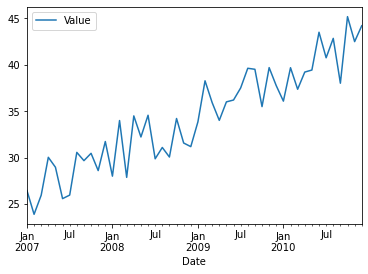

In [19]:
my_data.plot()

<AxesSubplot:xlabel='Date'>

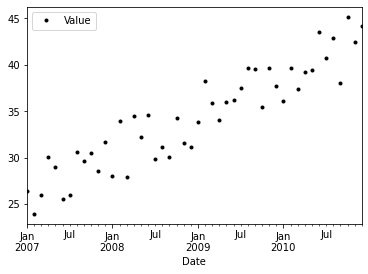

In [20]:
my_data.plot(style='k.')

<AxesSubplot:xlabel='Date'>

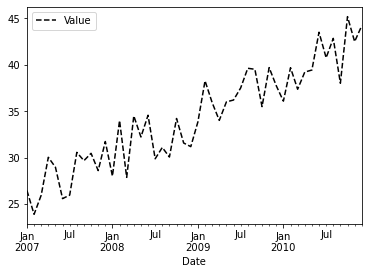

In [21]:
my_data.plot(style='k--')

In [33]:
series=my_data.squeeze()
type(series)

pandas.core.series.Series

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

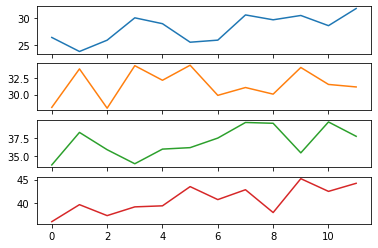

In [34]:
# create stacked line plots
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)

array([[<AxesSubplot:title={'center':'Value'}>]], dtype=object)

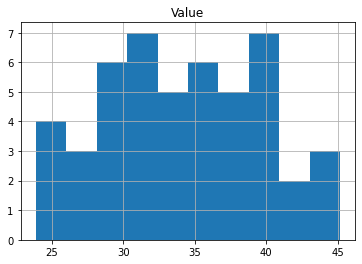

In [30]:
my_data.hist()

<AxesSubplot:ylabel='Density'>

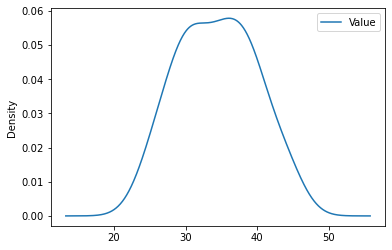

In [31]:
my_data.plot(kind='kde')

<AxesSubplot:>

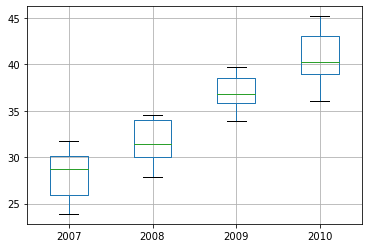

In [35]:
# create a boxplot of yearly data
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot()

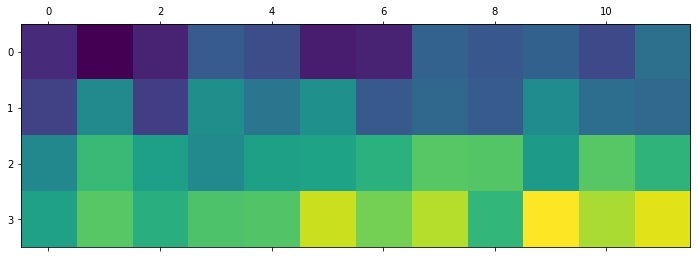

In [36]:
# create a heat map of yearly data
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')